In [2]:
api_key = "xxcc"
import json
from IPython.display import JSON

In [3]:
import pandas as pd

In [4]:
from googleapiclient.discovery import build

api_service_name = "youtube"
api_version = "v3"
client_secrets_file = "YOUR_CLIENT_SECRET_FILE.json"

youtube = build(
    api_service_name, api_version, developerKey=api_key)

request = youtube.channels().list(
    part="snippet,contentDetails,statistics",
    id="UCfQgsKhHjSyRLOp9mnffqVg"
)
response = request.execute()

JSON(response)

<IPython.core.display.JSON object>

In [5]:
for item in response["items"]:
    data = [{"channel_name" : item["snippet"]["title"],
           "subscriber_count":item["statistics"]["subscriberCount"],
           "view_count":item["statistics"]["viewCount"],
            "total_videos":item["statistics"]["videoCount"],
            "playlistid":item["contentDetails"]["relatedPlaylists"]["uploads"]
           }]
dataframe = pd.DataFrame(data)
dataframe

,channel_name,subscriber_count,view_count,total_videos,playlistid
0,Renaissance Periodization,2840000,1032469078,2433,UUfQgsKhHjSyRLOp9mnffqVg


In [6]:
request = youtube.playlistItems().list(
        part="snippet,contentDetails",
        playlistId="UUfQgsKhHjSyRLOp9mnffqVg",
        maxResults=50
 )
response = request.execute()

list_id = []
for item in response["items"]:
    list_id.append(item["contentDetails"]["videoId"])
next_page_token = response.get("nextPageToken")
while next_page_token is not None:
    request = youtube.playlistItems().list(
        part="snippet,contentDetails",
        playlistId="UUfQgsKhHjSyRLOp9mnffqVg",
        maxResults=50,
        pageToken = next_page_token
     )
    response = request.execute()
    for item in response["items"]:
        list_id.append(item["contentDetails"]["videoId"])
    next_page_token = response.get("nextPageToken")
    
print(len(list_id))


2222


In [7]:
all_info = []
for i in range(0,len(list_id),50):
    request = youtube.videos().list(
           part="snippet,contentDetails,statistics",
           id = ",".join(list_id[i:i+50])
    )
    response = request.execute()

    for item in response["items"]:
        stats_tokeep = {"snippet":["channelTitle","title","description","tags","publishedAt"],
                        "statistics":["viewCount","likeCount","favoriteCount","commentCount"],
                        "contentDetails":["duration","definition","caption"]}
        video_info ={}
        video_info["video_id"] = item["id"]
    
    
        for k in stats_tokeep.keys():
            for v in stats_tokeep[k]:
                try:
                    video_info[v] = item[k][v]
                except:
                    video_info[v] = None
        all_info.append(video_info)
rp_dataframe = pd.DataFrame(all_info)
rp_dataframe.head()


,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favoriteCount,commentCount,duration,definition,caption
0,_SqG3y-Gf3Y,Renaissance Periodization,This WILL NOT Make You Recover Faster,The UPDATED RP HYPERTROPHY APP: https://rpstre...,None,2024-10-27T19:00:18Z,49774,3880,0,62,PT51S,hd,false
1,v5UJidcMbjs,Renaissance Periodization,This is an AWESOME Leg Growth Trick,The UPDATED RP HYPERTROPHY APP: https://rpstre...,None,2024-10-27T16:00:58Z,151092,11774,0,92,PT59S,hd,false
2,iE7v4vgLeHg,Renaissance Periodization,Jump Squats Are a Poor Exercise Choice,The UPDATED RP HYPERTROPHY APP: https://rpstre...,None,2024-10-27T12:42:54Z,52159,3083,0,67,PT51S,hd,false
3,tMxK7WglXrg,Renaissance Periodization,Here's How Much Muscle You SHOULD Have,The UPDATED RP HYPERTROPHY APP: https://rpstre...,None,2024-10-26T20:00:16Z,403285,24810,0,286,PT59S,hd,false
4,dBfbPqNjuX8,Renaissance Periodization,This Technique Could TEAR Your Biceps!,The UPDATED RP HYPERTROPHY APP: https://rpstre...,None,2024-10-26T18:05:38Z,648734,35068,0,404,PT53S,hd,false


In [8]:
rp_dataframe.describe()

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favoriteCount,commentCount,duration,definition,caption
count,2222,2222,2222,2222,1053,2222,2222,2213,2222,2198,2222,2222,2222
unique,2222,1,2217,838,1010,2216,2216,2067,1,979,1043,2,1
top,_SqG3y-Gf3Y,Renaissance Periodization,When Should You Train The Muscles You Want To ...,The ALL NEW RP Hypertrophy App: https://rp.app...,"[cooking, kitchen, healthy, organic, weightlos...",2019-10-21T16:55:09Z,157657,146,0,5,PT1M,hd,false
freq,1,2222,2,173,10,2,2,4,2222,20,52,2221,2222


In [9]:
rp_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2222 entries, 0 to 2221
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   video_id       2222 non-null   object
 1   channelTitle   2222 non-null   object
 2   title          2222 non-null   object
 3   description    2222 non-null   object
 4   tags           1053 non-null   object
 5   publishedAt    2222 non-null   object
 6   viewCount      2222 non-null   object
 7   likeCount      2213 non-null   object
 8   favoriteCount  2222 non-null   object
 9   commentCount   2198 non-null   object
 10  duration       2222 non-null   object
 11  definition     2222 non-null   object
 12  caption        2222 non-null   object
dtypes: object(13)
memory usage: 225.8+ KB


In [10]:
# data_types={'video_id':str,
#             'channelTitle':str,
#             'title':str,
#             'description':str,
#             # 'tags':str,
#             'publishedAt':str,
#             'viewCount':int,
#             # 'likeCount':int,
#             'favoriteCount':int,''
#             # 'commentCount':int,
#             'duration':str,
#             'definition':str,
#             'caption':str}
# rp_dataframe = rp_dataframe.astype(data_types)
rp_dataframe[['viewCount','likeCount','favoriteCount','commentCount']] = rp_dataframe[['viewCount','likeCount','favoriteCount','commentCount']].apply(pd.to_numeric)

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: >

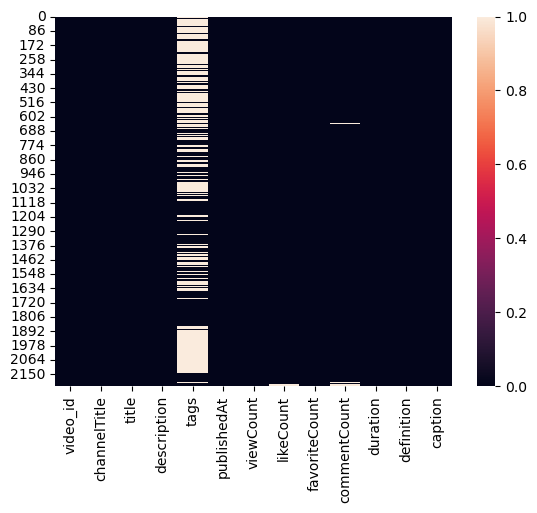

In [12]:
sns.heatmap(rp_dataframe.isnull())

In [13]:
# there were some values of likes and comments null so we take average and fill in there
average_likes = rp_dataframe["likeCount"].mean()
average_comments= rp_dataframe["commentCount"].mean()

rp_dataframe["commentCount"].fillna(average_comments,inplace=True)
rp_dataframe["likeCount"].fillna(average_likes,inplace=True)

C:\Users\dhali\AppData\Local\Temp\ipykernel_400\80708143.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  rp_dataframe["commentCount"].fillna(average_comments,inplace=True)
C:\Users\dhali\AppData\Local\Temp\ipykernel_400\80708143.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

<Axes: >

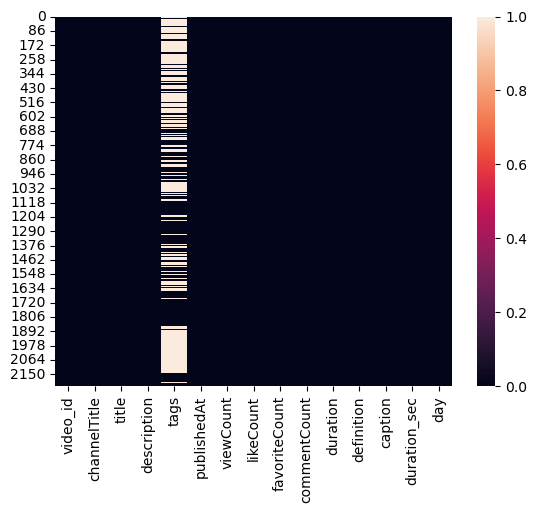

In [17]:
sns.heatmap(rp_dataframe.isnull())

In [14]:
import isodate
rp_dataframe['duration_sec']=rp_dataframe['duration'].apply(lambda x:isodate.parse_duration(x))
rp_dataframe['duration_sec']=rp_dataframe['duration_sec'].astype('timedelta64[s]')

In [15]:
from dateutil import parser
rp_dataframe['publishedAt']=rp_dataframe['publishedAt'].apply(lambda x:parser.parse(x))
rp_dataframe['day']=rp_dataframe['publishedAt'].apply(lambda x:x.strftime("%A"))

In [16]:
rp_dataframe.head()

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favoriteCount,commentCount,duration,definition,caption,duration_sec,day
0,_SqG3y-Gf3Y,Renaissance Periodization,This WILL NOT Make You Recover Faster,The UPDATED RP HYPERTROPHY APP: https://rpstre...,None,2024-10-27 19:00:18+00:00,49774,3880.0,0,62.0,PT51S,hd,false,0 days 00:00:51,Sunday
1,v5UJidcMbjs,Renaissance Periodization,This is an AWESOME Leg Growth Trick,The UPDATED RP HYPERTROPHY APP: https://rpstre...,None,2024-10-27 16:00:58+00:00,151092,11774.0,0,92.0,PT59S,hd,false,0 days 00:00:59,Sunday
2,iE7v4vgLeHg,Renaissance Periodization,Jump Squats Are a Poor Exercise Choice,The UPDATED RP HYPERTROPHY APP: https://rpstre...,None,2024-10-27 12:42:54+00:00,52159,3083.0,0,67.0,PT51S,hd,false,0 days 00:00:51,Sunday
3,tMxK7WglXrg,Renaissance Periodization,Here's How Much Muscle You SHOULD Have,The UPDATED RP HYPERTROPHY APP: https://rpstre...,None,2024-10-26 20:00:16+00:00,403285,24810.0,0,286.0,PT59S,hd,false,0 days 00:00:59,Saturday
4,dBfbPqNjuX8,Renaissance Periodization,This Technique Could TEAR Your Biceps!,The UPDATED RP HYPERTROPHY APP: https://rpstre...,None,2024-10-26 18:05:38+00:00,648734,35068.0,0,404.0,PT53S,hd,false,0 days 00:00:53,Saturday


In [28]:
rp_dataframe['sec']=rp_dataframe['duration_sec'].astype('int64')
rp_dataframe.head()

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favoriteCount,commentCount,duration,definition,caption,duration_sec,day,sec
0,_SqG3y-Gf3Y,Renaissance Periodization,This WILL NOT Make You Recover Faster,The UPDATED RP HYPERTROPHY APP: https://rpstre...,None,2024-10-27 19:00:18+00:00,49774,3880.0,0,62.0,PT51S,hd,false,0 days 00:00:51,Sunday,51
1,v5UJidcMbjs,Renaissance Periodization,This is an AWESOME Leg Growth Trick,The UPDATED RP HYPERTROPHY APP: https://rpstre...,None,2024-10-27 16:00:58+00:00,151092,11774.0,0,92.0,PT59S,hd,false,0 days 00:00:59,Sunday,59
2,iE7v4vgLeHg,Renaissance Periodization,Jump Squats Are a Poor Exercise Choice,The UPDATED RP HYPERTROPHY APP: https://rpstre...,None,2024-10-27 12:42:54+00:00,52159,3083.0,0,67.0,PT51S,hd,false,0 days 00:00:51,Sunday,51
3,tMxK7WglXrg,Renaissance Periodization,Here's How Much Muscle You SHOULD Have,The UPDATED RP HYPERTROPHY APP: https://rpstre...,None,2024-10-26 20:00:16+00:00,403285,24810.0,0,286.0,PT59S,hd,false,0 days 00:00:59,Saturday,59
4,dBfbPqNjuX8,Renaissance Periodization,This Technique Could TEAR Your Biceps!,The UPDATED RP HYPERTROPHY APP: https://rpstre...,None,2024-10-26 18:05:38+00:00,648734,35068.0,0,404.0,PT53S,hd,false,0 days 00:00:53,Saturday,53


Data Visualization

In [29]:
rpdf = rp_dataframe[['viewCount','likeCount','commentCount','day','sec']]

In [30]:
rpdf.head()

,viewCount,likeCount,commentCount,day,sec
0,49774,3880.0,62.0,Sunday,51
1,151092,11774.0,92.0,Sunday,59
2,52159,3083.0,67.0,Sunday,51
3,403285,24810.0,286.0,Saturday,59
4,648734,35068.0,404.0,Saturday,53


In [52]:
rpdf['shorts']=rpdf['sec'].apply(lambda x: True if x<61 else False)
rpdf.head()

C:\Users\dhali\AppData\Local\Temp\ipykernel_400\514754482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rpdf['shorts']=rpdf['sec'].apply(lambda x: True if x<61 else False)


,viewCount,likeCount,commentCount,day,sec,shorts
0,49774,3880.0,62.0,Sunday,51,True
1,151092,11774.0,92.0,Sunday,59,True
2,52159,3083.0,67.0,Sunday,51,True
3,403285,24810.0,286.0,Saturday,59,True
4,648734,35068.0,404.0,Saturday,53,True


In [93]:
rp_dataframe["shorts"]=rpdf['shorts']

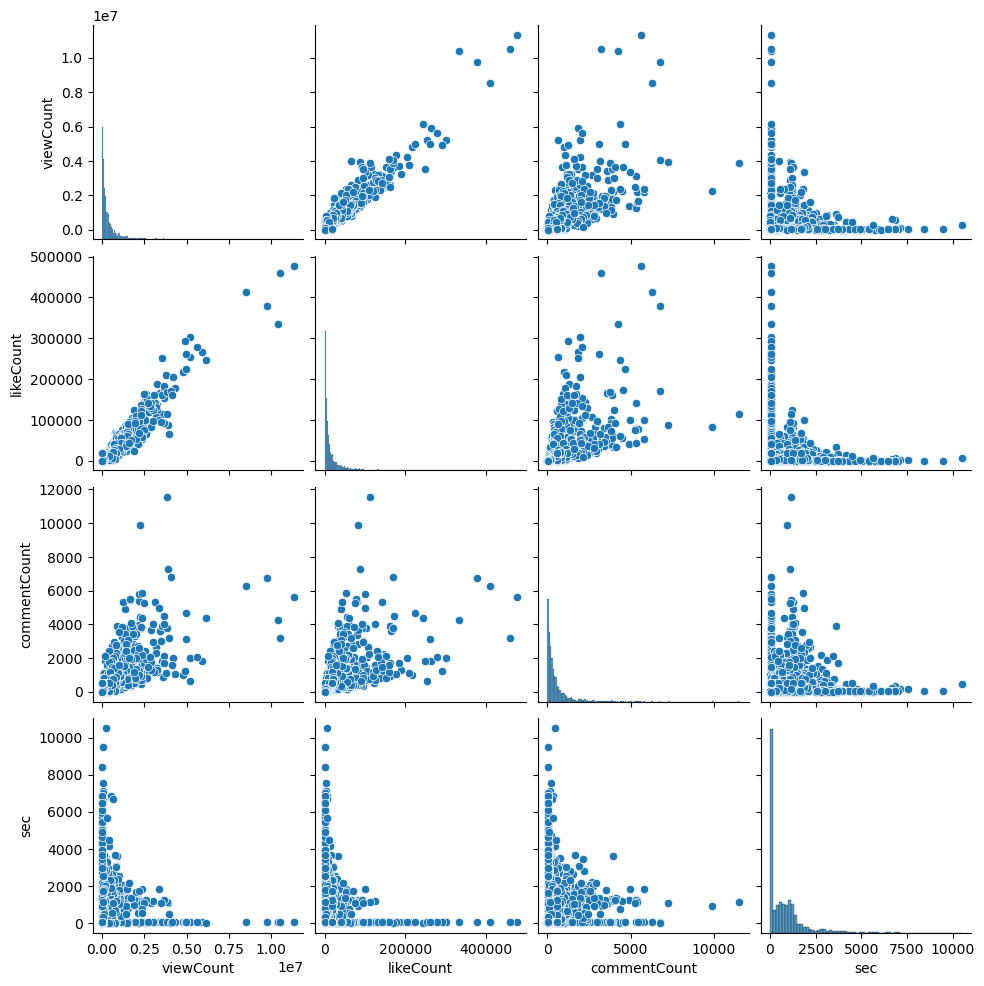

In [31]:
sns.pairplot(data=rpdf)

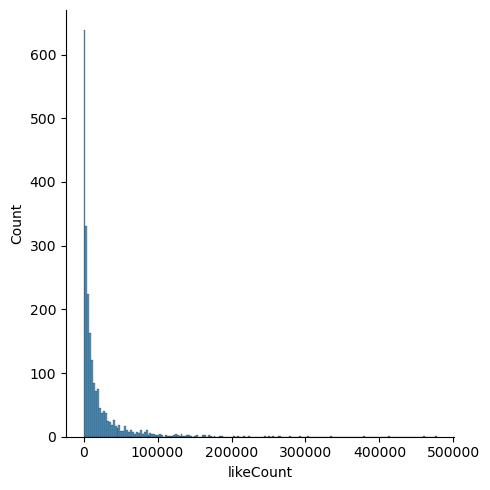

In [37]:
sns.displot(rpdf['likeCount'])

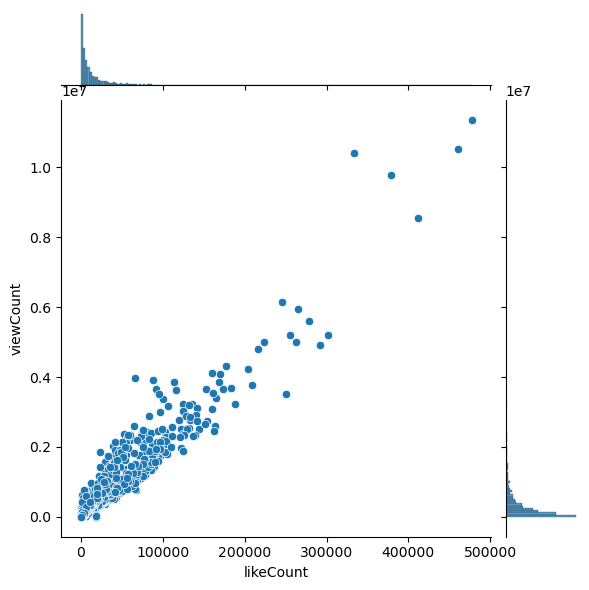

In [41]:
sns.jointplot(data=rpdf,x='likeCount',y='viewCount')

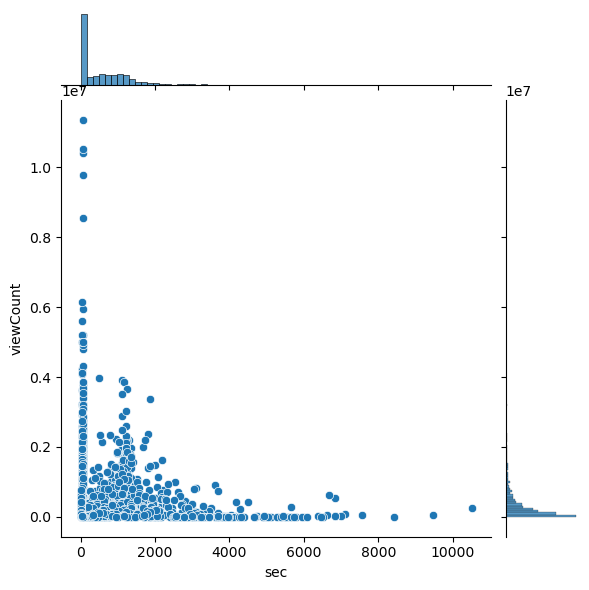

In [44]:
sns.jointplot(data=rpdf,x='sec',y='viewCount')

<Axes: xlabel='day', ylabel='viewCount'>

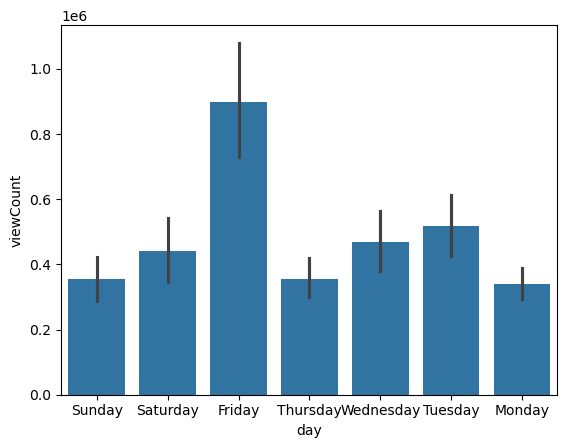

In [48]:
sns.barplot(data=rpdf,x='day',y='viewCount')

<Axes: xlabel='day', ylabel='commentCount'>

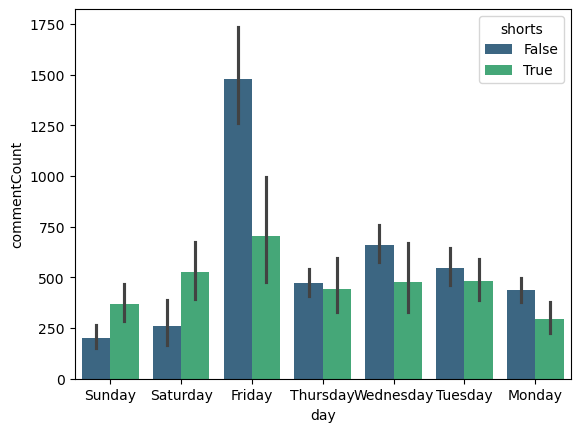

In [53]:
sns.barplot(data=rpdf,x='day',y='commentCount',palette='viridis',hue="shorts")

<Axes: xlabel='day', ylabel='likeCount'>

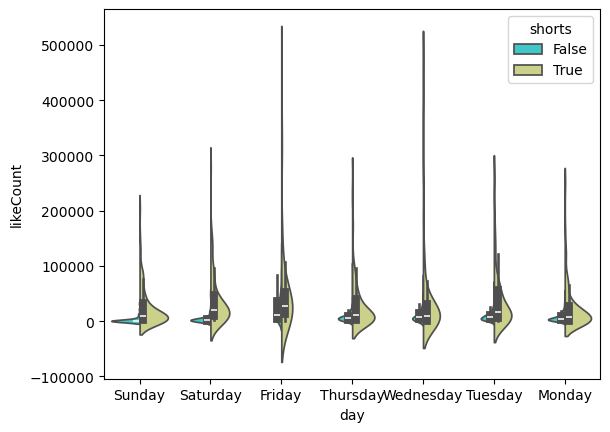

In [57]:
sns.violinplot(data=rpdf,x='day',y='likeCount',hue='shorts',split=True,palette="rainbow")

<Axes: xlabel='day', ylabel='likeCount'>

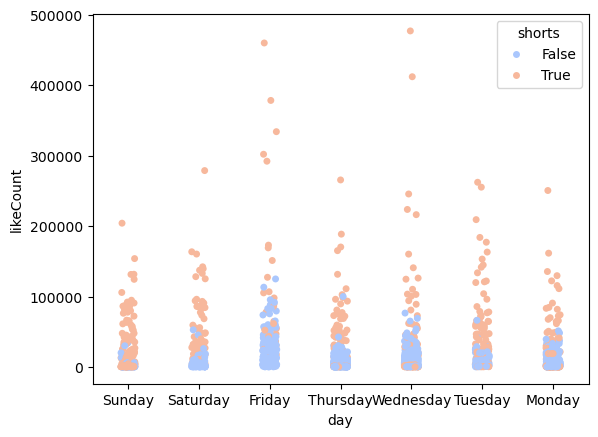

In [63]:
sns.stripplot(data=rpdf,x='day',y='likeCount',hue='shorts',palette='coolwarm')

<Axes: >

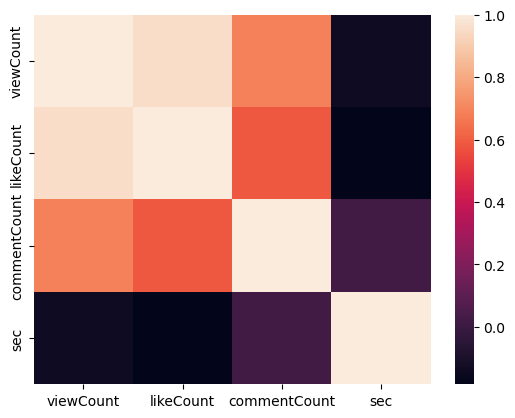

In [65]:
sns.heatmap(rpdf[['viewCount','likeCount','commentCount','sec']].corr())

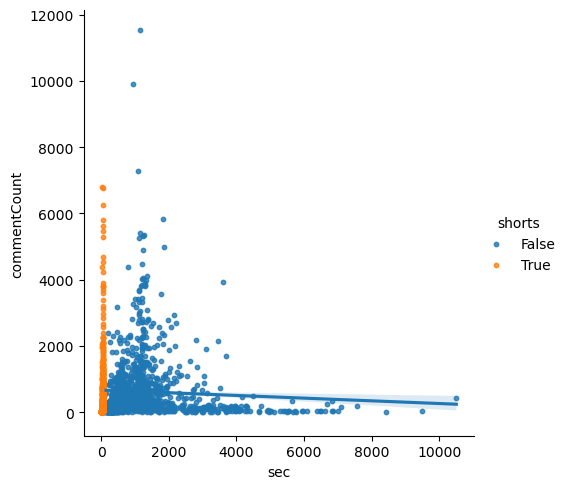

In [71]:
sns.lmplot(data=rpdf,x="sec",y="commentCount",scatter_kws={"s": 10},hue="shorts")

<Axes: xlabel='channelTitle', ylabel='viewCount'>

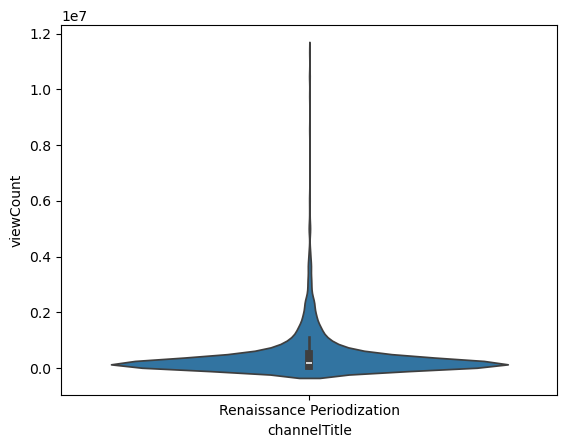

In [105]:
sns.violinplot(data=rp_dataframe,x="channelTitle",y="viewCount")

C:\Users\dhali\AppData\Local\Temp\ipykernel_400\1398265673.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\dhali\AppData\Local\Temp\ipykernel_400\1398265673.py:2: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



NameError: name 'ticker' is not defined

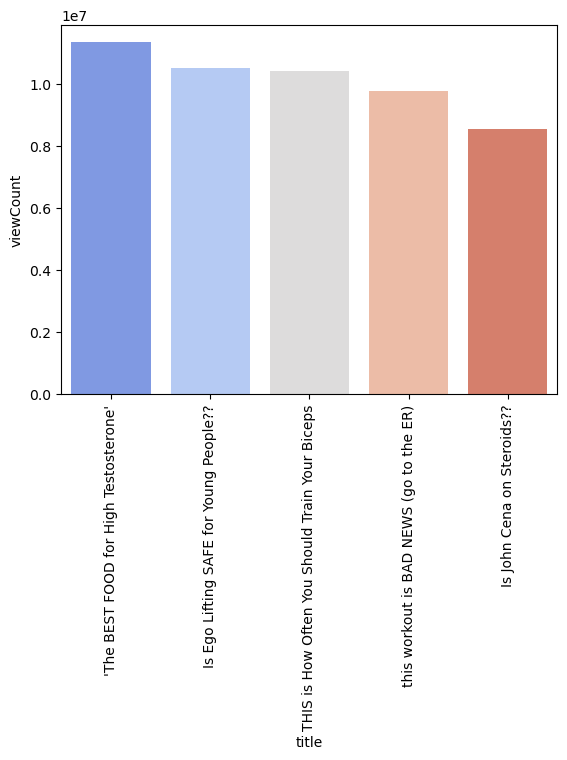

In [106]:
ax = sns.barplot(data=rp_dataframe.sort_values(by='viewCount',ascending=False)[:5],x="title",y="viewCount",palette='coolwarm')
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000) + 'K'))

<Axes: xlabel='day', ylabel='count'>

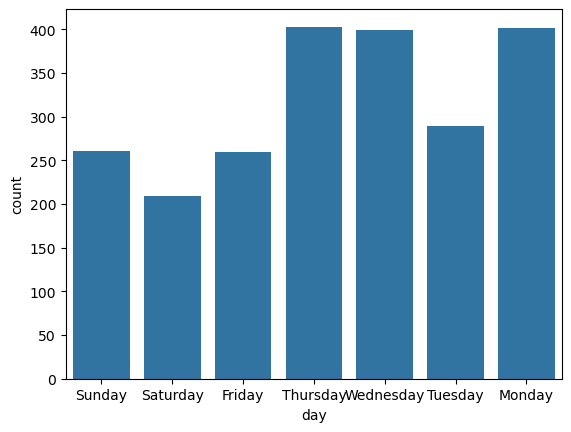

In [111]:
sns.countplot(data=rpdf,x="day")

In [72]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.go_offline()

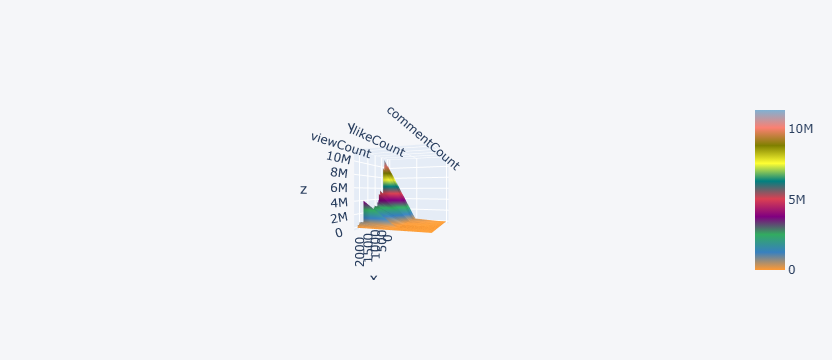

In [79]:
rpdf[["viewCount",'likeCount','commentCount']].iplot(kind="surface")

In [100]:
rp_dataframe[rp_dataframe['shorts']==False].sort_values(by='viewCount',ascending=False).head()

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favoriteCount,commentCount,duration,definition,caption,duration_sec,day,sec,shorts
1881,O7SLwIDyYrk,Renaissance Periodization,Ethan Suplee's Weight Loss Journey: How He Los...,Ethan Suplee is an American film and televisio...,"[celebrity fitness, body transformation, holly...",2020-04-21 16:00:24+00:00,3981042,66224.0,0,3188.0,PT8M1S,hd,false,0 days 00:08:01,Tuesday,481,False
317,8jhmlRWO3DU,Renaissance Periodization,Exercise Scientist Critiques Joe Rogan's Train...,Grab a set of Versa Gripps today! For 15% off...,"[mike israetel, exercise scientist, celebrity ...",2024-07-05 16:00:08+00:00,3914394,88210.0,0,7283.0,PT18M23S,hd,false,0 days 00:18:23,Friday,1103,False
893,LzNkmlfGOKk,Renaissance Periodization,Exercise Scientist Exposes V Shred's Diet And ...,Dr. Mike Israetel Reacts to the best and worst...,"[v shred, weight loss, v shred review, v shred...",2023-08-25 16:00:15+00:00,3861616,113237.0,0,11546.0,PT19M15S,hd,false,0 days 00:19:15,Friday,1155,False
903,kLPH8HKdnNg,Renaissance Periodization,Exercise Scientist Critiques Sam Sulek's Workouts,Dr. Mike Israetel Reacts to the best and worst...,"[sam sulek, sam sulek steroids, sam sulek spli...",2023-08-18 15:57:16+00:00,3666642,91724.0,0,4042.0,PT20M40S,hd,false,0 days 00:20:40,Friday,1240,False
970,nLsZ23BeoYA,Renaissance Periodization,Exercise Scientist Puts LeanBeefPatty's Workou...,Dr. Mike Israetel Reacts to the best and worst...,"[lean beef patty, mens health workout, lean be...",2023-06-30 15:55:14+00:00,3506933,95419.0,0,2990.0,PT18M27S,hd,false,0 days 00:18:27,Friday,1107,False


In [101]:
rp_dataframe[rp_dataframe['shorts']==False].sort_values(by='likeCount',ascending=False).head()

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favoriteCount,commentCount,duration,definition,caption,duration_sec,day,sec,shorts
782,3DKPgp3tdsU,Renaissance Periodization,Exercise Scientist Critiques PewDiePie's Training,The RP Hypertrophy App: your ultimate guide to...,"[mike israetel, hollywood workout plan, pewdie...",2023-11-10 16:00:02+00:00,3024562,124957.0,0,4009.0,PT20M10S,hd,false,0 days 00:20:10,Friday,1210,False
893,LzNkmlfGOKk,Renaissance Periodization,Exercise Scientist Exposes V Shred's Diet And ...,Dr. Mike Israetel Reacts to the best and worst...,"[v shred, weight loss, v shred review, v shred...",2023-08-25 16:00:15+00:00,3861616,113237.0,0,11546.0,PT19M15S,hd,false,0 days 00:19:15,Friday,1155,False
687,He_-f1ZCCJE,Renaissance Periodization,The Best Supplements For Muscle Growth And Health,The RP Hypertrophy App: your ultimate guide to...,"[best supplements to build muscle, supplements...",2024-01-11 17:00:10+00:00,3370202,100006.0,0,4984.0,PT30M57S,hd,false,0 days 00:30:57,Thursday,1857,False
970,nLsZ23BeoYA,Renaissance Periodization,Exercise Scientist Puts LeanBeefPatty's Workou...,Dr. Mike Israetel Reacts to the best and worst...,"[lean beef patty, mens health workout, lean be...",2023-06-30 15:55:14+00:00,3506933,95419.0,0,2990.0,PT18M27S,hd,false,0 days 00:18:27,Friday,1107,False
903,kLPH8HKdnNg,Renaissance Periodization,Exercise Scientist Critiques Sam Sulek's Workouts,Dr. Mike Israetel Reacts to the best and worst...,"[sam sulek, sam sulek steroids, sam sulek spli...",2023-08-18 15:57:16+00:00,3666642,91724.0,0,4042.0,PT20M40S,hd,false,0 days 00:20:40,Friday,1240,False
